# AirBNB Listing Analysis

# Imports

In [164]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

### Objective 1: Profile & QA the data

* **Task 1: Import/Open the `Listings.csv` file**
    * Read the `Listings.csv` file into a Pandas DataFrame.

* **Task 2: Cast any date columns as a datetime format**
    * Convert the 'host_since' column to datetime format.

In [144]:
base_dir = os.path.dirname(os.getcwd())
df = pd.read_csv(os.path.join(base_dir, 'data', 'raw', 'Listings.csv'), encoding='ISO-8859-1', low_memory=False, parse_dates=['host_since'])

In [145]:
df.head

<bound method NDFrame.head of         listing_id                                               name  \
0           281420     Beautiful Flat in le Village Montmartre, Paris   
1          3705183                    39 mÃÂ² Paris (Sacre CÃ
âur)   
2          4082273                Lovely apartment with Terrace, 60m2   
3          4797344                Cosy studio (close to Eiffel tower)   
4          4823489   Close to Eiffel Tower - Beautiful flat : 2 rooms   
...            ...                                                ...   
279707    38338635  Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...   
279708    38538692                          Cozy Studio in Montmartre   
279709    38683356            Nice and cosy mini-appartement in Paris   
279710    39659000  Charming apartment near Rue Saint Maur / Oberk...   
279711    40219504        Cosy apartment with view on Canal St Martin   

         host_id host_since                 host_location host_response_time  \
0        1466

* **Task 3: Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’**
    * Filter the DataFrame to include only rows where the 'city' column is 'Paris'.
    * Select and retain only the specified columns.

In [146]:
df = df[['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
df = df[df['city'] == 'Paris']
df.head

<bound method NDFrame.head of        host_since      neighbourhood   city  accommodates  price
0      2011-12-03  Buttes-Montmartre  Paris             2     53
1      2013-11-29  Buttes-Montmartre  Paris             2    120
2      2014-07-31             Elysee  Paris             2     89
3      2013-12-17          Vaugirard  Paris             2     58
4      2014-12-14              Passy  Paris             2     60
...           ...                ...    ...           ...    ...
279707 2015-04-13       Observatoire  Paris             2    120
279708 2013-11-27  Buttes-Montmartre  Paris             2     60
279709 2012-04-27  Buttes-Montmartre  Paris             2     50
279710 2015-07-16         Popincourt  Paris             2    105
279711 2013-06-17  Enclos-St-Laurent  Paris             2     70

[64690 rows x 5 columns]>

* **Task 4: QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field**
    * Check for missing values in the filtered DataFrame.
    * Calculate the minimum, maximum, and average values for the 'accommodates' and 'price' columns.

In [147]:
df.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [148]:
df.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


### Objective 2: Prepare the data for visualization

* **Task 5: Create a table named `paris_listings_neighbourhood` that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)**
    * Group the filtered DataFrame by 'neighbourhood'.
    * Calculate the mean price for each neighbourhood.
    * Sort the results by mean price in ascending order.

In [149]:
paris_listings_neighbourhood = df.groupby('neighbourhood').agg({"price": "mean"}).sort_values("price")

In [150]:
paris_listings_neighbourhood

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


* **Task 6: Create a table named `paris_listings_accomodations`, filter down to the most expensive neighbourhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)**
    * Find the most expensive neighbourhood from the previous created table.
    * Filter the paris listings data to only include the most expensive neighbourhood.
    * Group the filtered DataFrame by 'accommodates'.
    * Calculate the mean price for each 'accommodates' value.
    * Sort the results by 'accommodates' in ascending order.

In [151]:
most_expensive_neighbourhood = paris_listings_neighbourhood.index[-1]

In [152]:
df_most_expensive_neighbourhood = df[df['neighbourhood'] == most_expensive_neighbourhood]

In [153]:
paris_listings_accomodations = df_most_expensive_neighbourhood.groupby('accommodates').agg({"price": "mean"}).sort_values("accommodates")

In [154]:
paris_listings_accomodations.head()

,price
accommodates,
0,0.000000
1,79.522222
2,155.103352
3,152.828767
4,212.096070


* **Task 7: Create a table called `paris_listings_over_time` grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts**
    * Extract the year from the 'host_since' column.
    * Group the DataFrame by the extracted year.
    * Calculate the average price and the count of rows (new hosts) for each year.

In [155]:
paris_listings_over_time = df.set_index("host_since").resample("Y").agg({"neighbourhood": "count", "price": "mean"})
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


### Objective 3: Visualize the data and summarize findings

* **Task 8: Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed**
    * Use the `paris_listings_neighbourhood` DataFrame to create a horizontal bar chart.
    * Add a title and appropriate axis labels.

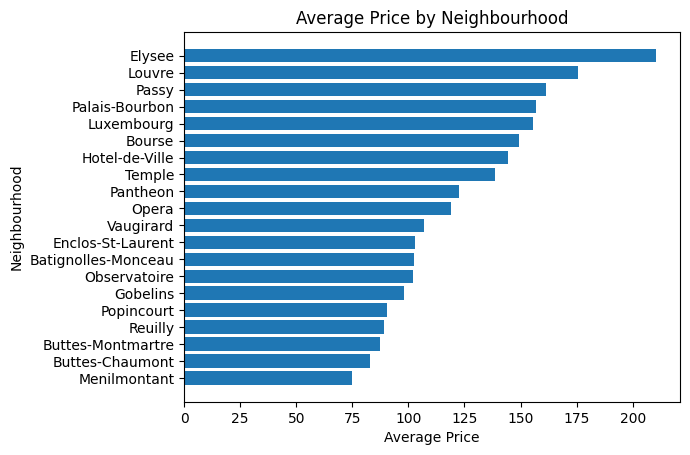

In [156]:
plt.barh(paris_listings_neighbourhood.index, paris_listings_neighbourhood['price'])
plt.ylabel('Neighbourhood')
plt.xlabel('Average Price')
plt.title('Average Price by Neighbourhood')
plt.show()

* **Task 9: Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed**
    * Use the `paris_listings_accomodations` DataFrame to create a horizontal bar chart.
    * Add a title and appropriate axis labels.

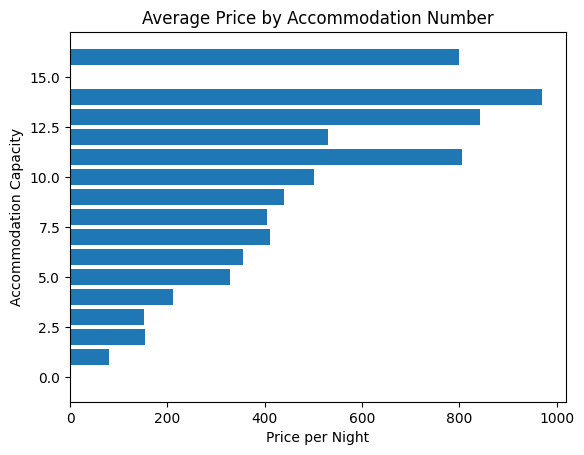

In [159]:
paris_listings_accomodations = paris_listings_accomodations.reset_index()
plt.barh(paris_listings_accomodations['accommodates'], paris_listings_accomodations['price'])
plt.ylabel('Accommodation Capacity')
plt.xlabel('Price per Night')
plt.title('Average Price by Accommodation Number')
plt.show()

* **Task 10: Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed**
    * Use the `paris_listings_over_time` DataFrame to create two line charts.
    * Set the y-axis limit to 0 for both charts.
    * Add titles and appropriate axis labels.

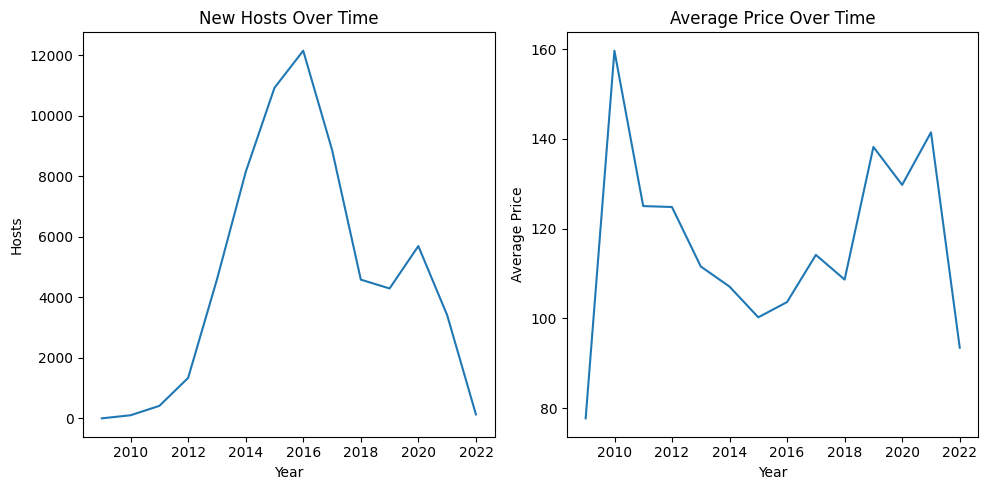

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(paris_listings_over_time.index, paris_listings_over_time['neighbourhood'])
axes[0].set_title("New Hosts Over Time")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Hosts")

axes[1].plot(paris_listings_over_time.index, paris_listings_over_time['price'])
axes[1].set_title("Average Price Over Time")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Average Price")

plt.tight_layout()
plt.show()

* **Task 11: Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?**
    * Analyze the line charts to determine the impact of the 2015 regulations.

* **Task 12: BONUS: Create a dual axis line chart to show both new hosts and average price over time**
    * Create a dual axis line chart from the paris_listings_over_time table.

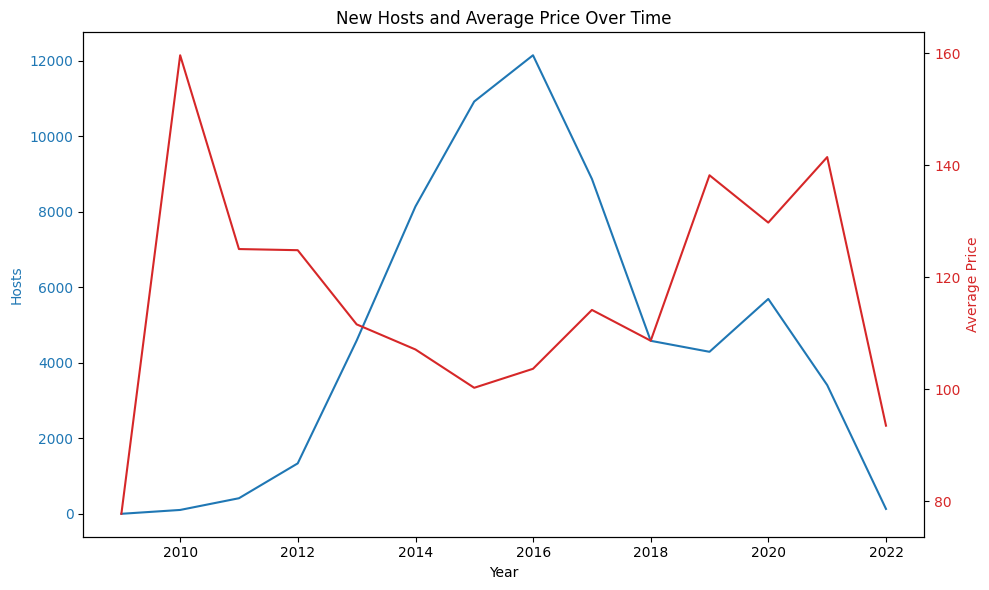

In [170]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Hosts', color=color)
ax1.plot(paris_listings_over_time.index, paris_listings_over_time['neighbourhood'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Average Price', color=color)
ax2.plot(paris_listings_over_time.index, paris_listings_over_time['price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('New Hosts and Average Price Over Time')
fig.tight_layout()
plt.show()